# An Analysis of the Cybercrime landscape in an AI World

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->
#### <span style = 'color:green'>Understanding whether AI availability has contributed to rising cybercrime rates and attack sophistication.</span>

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->
#### <span style = 'color:green'>Is there a measurable correlation between AI accessibility and changes in cybercrime trends?</span>

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
#### <span style = 'color: green'>AI availability has contributed to an increase in cybercrime volume and sophistication, as these tools lower technical barriers for attackers and eliminate traditional red flags such as misspellings in phishing emails.</span>

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
* **Cyber Events Database:** The Cyber Events Database consists of publicly available information on cyber events
    * https://cissm.umd.edu/research-impact/publications/cyber-events-database-home
* **Global Cybersecurity Threats (2015-2024):** <span style = 'color:red; font-style: italic'>This was determined to be generated data and will not be used extensively for analysis</span> A comprehensive dataset tracking cybersecurity incidents, attack vectors, threat 
    * https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024
* **AI incident database:** Documenting the times when things go wrong with AI solutions
    * https://www.kaggle.com/datasets/konradb/ai-incident-database
* **Epoch AI:** Comprehensive database of over 3200 models tracks key factors driving machine learning progress
    * https://epoch.ai/data/ai-models 

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->
<br>
#### <span style = 'color:green'>ChatGPT's public release was November of 2022 we will use that as a data point to compare metrics before and after wide spread AI availability. The Global Cybersecurity Threats dataset provides volume and attack type trends, the Cyber Events Database shows incident level context on motives and actors, and the AI Incident Database identifies specific cases of AI use allowing us to try and correlate AI availability with changes in cybercrime patterns.</span>

# Imports and Data Loading

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [2]:
# Load datasets

# AI Incident Database
ai_incidents = pd.read_csv('data/AI_incidents_database.csv')

# Global Cybersecurity Threats
cyber_threats = pd.read_csv('data/Global_Cybersecurity_Threats_2015_2024.csv')

# CISSM Cyber Events Database
cyber_events = pd.read_csv('data/CISSM_Cyber_Events_Database_2014_Oct_2025.csv')

# Epoch AI Model Tracking
epoch_ai_models = pd.read_csv('data/epoch_ai_models.csv')

---
# Initial Data Analysis

View first few rows of each dataset

In [3]:
# Check first few rows of each dataset

display("AI Incidents Database")
display(ai_incidents.head())

display("Global Cybersecurity Threats")
display(cyber_threats.head())

display("CISSM Cyber Events Database")
display(cyber_events.head())

display("Epoch AI Model Tracking")
display(epoch_ai_models.head())

'AI Incidents Database'

,_id,incident_id,date,reports,Alleged deployer of AI system,Alleged developer of AI system,Alleged harmed or nearly harmed parties,description,title
0,ObjectId(625763de343edc875fe63a15),23,2017-11-08,"[242,243,244,245,246,247,248,249,250,253,254,2...","[""navya"",""keolis-north-america""]","[""navya"",""keolis-north-america""]","[""navya"",""keolis-north-america"",""bus-passengers""]",A self-driving public shuttle by Keolis North ...,Las Vegas Self-Driving Bus Involved in Accident
1,ObjectId(625763dc343edc875fe63a02),4,2018-03-18,"[629,630,631,632,633,634,635,636,637,638,639,6...","[""uber""]","[""uber""]","[""elaine-herzberg"",""pedestrians""]",An Uber autonomous vehicle (AV) in autonomous ...,Uber AV Killed Pedestrian in Arizona
2,ObjectId(625763db343edc875fe639ff),1,2015-05-19,"[1,2,3,4,5,6,7,8,9,10,11,12,14,15]","[""youtube""]","[""youtube""]","[""children""]",YouTube’s content filtering and recommendation...,Google’s YouTube Kids App Presents Inappropria...
3,ObjectId(625763de343edc875fe63a10),18,2015-04-04,"[130,131,132,133,134,135,136,137,138,1367,1368]","[""google""]","[""google""]","[""women""]",Google Image returns results that under-repres...,Gender Biases of Google Image Search
4,ObjectId(625763dd343edc875fe63a0a),12,2016-07-21,[42],"[""microsoft-research"",""boston-university""]","[""microsoft-research"",""google"",""boston-univers...","[""women"",""minority-groups""]",Researchers from Boston University and Microso...,Common Biases of Vector Embeddings


'Global Cybersecurity Threats'

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


'CISSM Cyber Events Database'

,slug,original_method,event_date,reported_date,year,month,actor,actor_type,organization,industry_code,...,opec,gulf_coop,g7,g20,aukus,csto,oecd,osce,five_eyes,change_log
0,1f72c2eb8ab303e4,1,2014-01-01,NaN,2014,1,Undetermined,Criminal,Barry University,61,...,0,0,1,1,1,0,1,1,1,NaN
1,ecac8b3e60a2f72f,1,2014-01-01,NaN,2014,1,Undetermined,Criminal,Record Assist LLC,54,...,0,0,1,1,1,0,1,1,1,NaN
2,3bbe0695e2d019f3,1,2014-01-01,NaN,2014,1,Syrian Electronic Army,Hacktivist,Skype's Social Media,54,...,0,0,1,1,1,0,1,1,1,NaN
3,6100014f6ca84b3d,1,2014-01-02,NaN,2014,1,Undetermined,Criminal,Snapchat,51,...,0,0,1,1,1,0,1,1,1,NaN
4,3a94b8cf6dde1f66,1,2014-01-03,NaN,2014,1,DERP Trolling,Undetermined,Battle.net,51,...,0,0,1,1,1,0,1,1,1,NaN


'Epoch AI Model Tracking'

,Model,Domain,Task,Organization,Authors,Publication date,Reference,Link,Citations,Notability criteria,...,Training compute cost (2023 USD),Utilization notes,Numerical format,Frontier model,Training power draw (W),Training compute estimation method,Hugging Face developer id,Post-training compute (FLOP),Post-training compute notes,Hardware utilization (HFU)
0,Claude Opus 4.5,"Language,Multimodal,Vision","Code generation,Language modeling/generation,Q...",Anthropic,NaN,2025-11-24,Introducing Claude Opus 4.5,https://www.anthropic.com/news/claude-opus-4-5,NaN,SOTA improvement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gemini 3 Pro,"Multimodal,Language,Vision",Language modeling/generation,Google DeepMind,NaN,2025-11-18,A new era of intelligence with Gemini 3,https://blog.google/products/gemini/gemini-3/,NaN,Significant use,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GPT-5.1,"Multimodal,Language,Vision","Language modeling/generation,Question answering",OpenAI,NaN,2025-11-13,"GPT-5.1: A smarter, more conversational ChatGPT",https://openai.com/index/gpt-5-1/,NaN,Significant use,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kimi K2 Thinking,Language,"Language modeling/generation,Question answerin...",Moonshot,NaN,2025-11-06,Introducing Kimi K2 Thinking,https://moonshotai.github.io/Kimi-K2/thinking,NaN,SOTA improvement,...,NaN,NaN,NaN,NaN,NaN,Comparison with other models,moonshotai,NaN,NaN,NaN
4,Gen-0,Robotics,Robotic manipulation,Generalist,NaN,2025-11-04,GEN-0 / Embodied Foundation Models That Scale ...,https://generalistai.com/blog/nov-04-2025-GEN-0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


View shape and column info of our datasets

In [4]:
# Get info about each dataset
display("Dataset Shapes:")
display("AI Incidents:", ai_incidents.shape)
display("Global Cybersecurity Threats:", cyber_threats.shape)
display("CISSM Cyber Events:", cyber_events.shape)
display("Epoch AI Model Tracking:")
display(epoch_ai_models.shape)
display("AI Incidents Database Info")
display(ai_incidents.info())
display("Global Cybersecurity Threats Info")
display(cyber_threats.info())
display("CISSM Cyber Events Database Info")
display(cyber_events.info())
display("Epoch AI Model Tracking Info")
display(epoch_ai_models.info())

'Dataset Shapes:'

'AI Incidents:'

(514, 9)

'Global Cybersecurity Threats:'

(3000, 10)

'CISSM Cyber Events:'

(15789, 44)

'Epoch AI Model Tracking:'

(3204, 56)

'AI Incidents Database Info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   _id                                      514 non-null    object
 1   incident_id                              514 non-null    int64 
 2   date                                     514 non-null    object
 3   reports                                  514 non-null    object
 4   Alleged deployer of AI system            514 non-null    object
 5   Alleged developer of AI system           514 non-null    object
 6   Alleged harmed or nearly harmed parties  514 non-null    object
 7   description                              514 non-null    object
 8   title                                    514 non-null    object
dtypes: int64(1), object(8)
memory usage: 36.3+ KB


None

'Global Cybersecurity Threats Info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


None

'CISSM Cyber Events Database Info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15789 entries, 0 to 15788
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   slug             15789 non-null  object
 1   original_method  15789 non-null  int64 
 2   event_date       15789 non-null  object
 3   reported_date    1233 non-null   object
 4   year             15789 non-null  int64 
 5   month            15789 non-null  int64 
 6   actor            15789 non-null  object
 7   actor_type       15789 non-null  object
 8   organization     15789 non-null  object
 9   industry_code    15789 non-null  int64 
 10  industry         15789 non-null  object
 11  motive           15789 non-null  object
 12  event_type       15789 non-null  object
 13  event_subtype    15789 non-null  object
 14  magnitude        477 non-null    object
 15  duration         477 non-null    object
 16  scope            477 non-null    object
 17  ip               870 non-null  

None

'Epoch AI Model Tracking Info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               3204 non-null   object 
 1   Domain                              3120 non-null   object 
 2   Task                                3086 non-null   object 
 3   Organization                        3123 non-null   object 
 4   Authors                             2454 non-null   object 
 5   Publication date                    3186 non-null   object 
 6   Reference                           3047 non-null   object 
 7   Link                                3170 non-null   object 
 8   Citations                           1268 non-null   float64
 9   Notability criteria                 905 non-null    object 
 10  Notability criteria notes           773 non-null    object 
 11  Parameters                          2070 no

None

Check for null or missing values with our datasets

In [5]:
# Count null or missing values
display("AI Incidents Database Missing Values")
display(ai_incidents.isnull().sum())
display("Global Cybersecurity Threats Missing Values")
display(cyber_threats.isnull().sum())
display("CISSM Cyber Events Database Missing Values")
display(cyber_events.isnull().sum())
display("Epoch AI Model Tracking Missing Values")
display(epoch_ai_models.isnull().sum())

'AI Incidents Database Missing Values'

_id                                        0
incident_id                                0
date                                       0
reports                                    0
Alleged deployer of AI system              0
Alleged developer of AI system             0
Alleged harmed or nearly harmed parties    0
description                                0
title                                      0
dtype: int64

'Global Cybersecurity Threats Missing Values'

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

'CISSM Cyber Events Database Missing Values'

slug                   0
original_method        0
event_date             0
reported_date      14556
year                   0
month                  0
actor                  0
actor_type             0
organization           0
industry_code          0
industry               0
motive                 0
event_type             0
event_subtype          0
magnitude          15312
duration           15312
scope              15312
ip                 14919
org_data           14945
cust_data          14931
description            1
source_url             4
country                0
actor_country          0
state               8174
county              8336
nato                   0
eu                     0
shanghai_coop          0
oas                    0
mercosur               0
au                     0
ecowas                 0
asean                  0
opec                   0
gulf_coop              0
g7                     0
g20                    0
aukus                  0
csto                   0


'Epoch AI Model Tracking Missing Values'

Model                                    0
Domain                                  84
Task                                   118
Organization                            81
Authors                                750
Publication date                        18
Reference                              157
Link                                    34
Citations                             1936
Notability criteria                   2299
Notability criteria notes             2431
Parameters                            1134
Parameters notes                      1498
Training compute (FLOP)               1836
Training compute notes                1611
Training dataset size (gradients)     1891
Dataset size notes                    1577
Training time (hours)                 2663
Training time notes                   2612
Training hardware                     2047
Approach                              2904
Confidence                               0
Abstract                               395
Epochs     

---
# Data Preparation and Cleaning

In this section, we prepare each dataset for analysis by performing the following operations:

| Operation | Reason |
|-----------|---------|
| **DateTime conversion** | Enable temporal filtering and time-series analysis |
| **Year/month extraction** | Allow aggregation by time periods for trend analysis |
| **Column selection** | Retain only features relevant to our research question |
| **Duplicate removal** | Ensure data quality and accurate event counts |
| **Filtering (Epoch AI)** | Focus on publicly accessible language models, which are most relevant to AI-enabled cybercrime|
| **Column renaming** | Create consistency across datasets for easier merging |

In [6]:
# Data cleaning and preprocessing

# AI Incidents
# Convert date string to datetime and extract year for time based analysis, we need this to filter by month and year later
ai_incidents['date'] = pd.to_datetime(ai_incidents['date'])
ai_incidents['year'] = ai_incidents['date'].dt.year
ai_incidents['month'] = ai_incidents['date'].dt.month

# Select only columns relevant for analysis
ai_incidents_clean = ai_incidents[[
    'incident_id', 'date', 'year', 'month', 'title', 'description',
    'Alleged deployer of AI system', 'Alleged developer of AI system'
]].copy()

# Global Cybersecurity Threats
# Select relevant columns for trend and impact analysis
cyber_threats_clean = cyber_threats[[
    'Year', 'Country', 'Attack Type', 'Target Industry',
    'Financial Loss (in Million $)', 'Number of Affected Users',
    'Attack Source', 'Security Vulnerability Type'
]].copy()

# CISSM Cyber Events
# Convert event_date to datetime for time based filtering, we need this to filter by month and year later
cyber_events['event_date'] = pd.to_datetime(cyber_events['event_date'])

# Select columns relevant to motive, actor, and event classification
cyber_events_clean = cyber_events[[
    'event_date', 'year', 'month', 'actor_type', 'motive',
    'event_type', 'event_subtype', 'industry', 'country', 'description'
]].copy()
# Remove duplicate records from cyber events
cyber_events_clean = cyber_events_clean.drop_duplicates()

# Epoch AI Models
# Convert publication date to datetime
epoch_ai_models['Publication date'] = pd.to_datetime(epoch_ai_models['Publication date'], errors='coerce')
epoch_ai_models['year'] = epoch_ai_models['Publication date'].dt.year
epoch_ai_models['month'] = epoch_ai_models['Publication date'].dt.month

# Filter to publicly accessible models only (exclude internal/unreleased)
epoch_public_access_types = [
    'API access', 
    'Open weights (unrestricted)', 
    'Open weights (restricted use)', 
    'Hosted access (no API)'
]
epoch_public = epoch_ai_models[
    epoch_ai_models['Model accessibility'].isin(epoch_public_access_types)
].copy()

# Filter to language models (most relevant for AI-enabled cybercrime like phishing)
epoch_language = epoch_public[
    epoch_public['Domain'].str.contains('Language', case=False, na=False)
].copy()

# Select relevant columns for analysis
epoch_ai_clean = epoch_language[[
    'Model', 'Publication date', 'year', 'month',
    'Domain', 'Task', 'Organization', 'Country (of organization)',
    'Model accessibility', 'Parameters', 'Training compute (FLOP)'
]].copy()

# Rename columns for consistency
epoch_ai_clean.columns = [
    'model_name', 'publication_date', 'year', 'month',
    'domain', 'task', 'organization', 'country',
    'accessibility', 'parameters', 'training_compute_flop'
]

# Drop rows with missing publication dates and convert year/month to int
epoch_ai_clean = epoch_ai_clean.dropna(subset=['publication_date'])
epoch_ai_clean['year'] = epoch_ai_clean['year'].astype(int)
epoch_ai_clean['month'] = epoch_ai_clean['month'].astype(int)

display("Data cleaning and preprocessing completed.")
display("Cleaned AI Incidents Dataset")
display(ai_incidents_clean.head())
display("Cleaned Global Cybersecurity Threats Dataset")
display(cyber_threats_clean.head())
display("Cleaned CISSM Cyber Events Dataset")
display(cyber_events_clean.head())
display("Cyber Events after removing duplicates:") 
display(len(cyber_events_clean))
display("Cleaned Epoch AI Models Dataset (Public Language Models)")
display("Total models:", {len(epoch_ai_models)}, "Public models:", {len(epoch_public)}, "Public language models:", {len(epoch_ai_clean)})
display(epoch_ai_clean.head())

'Data cleaning and preprocessing completed.'

'Cleaned AI Incidents Dataset'

,incident_id,date,year,month,title,description,Alleged deployer of AI system,Alleged developer of AI system
0,23,2017-11-08,2017,11,Las Vegas Self-Driving Bus Involved in Accident,A self-driving public shuttle by Keolis North ...,"[""navya"",""keolis-north-america""]","[""navya"",""keolis-north-america""]"
1,4,2018-03-18,2018,3,Uber AV Killed Pedestrian in Arizona,An Uber autonomous vehicle (AV) in autonomous ...,"[""uber""]","[""uber""]"
2,1,2015-05-19,2015,5,Google’s YouTube Kids App Presents Inappropria...,YouTube’s content filtering and recommendation...,"[""youtube""]","[""youtube""]"
3,18,2015-04-04,2015,4,Gender Biases of Google Image Search,Google Image returns results that under-repres...,"[""google""]","[""google""]"
4,12,2016-07-21,2016,7,Common Biases of Vector Embeddings,Researchers from Boston University and Microso...,"[""microsoft-research"",""boston-university""]","[""microsoft-research"",""google"",""boston-univers..."


'Cleaned Global Cybersecurity Threats Dataset'

,Year,Country,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type
0,2019,China,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software
1,2019,China,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software
2,2017,India,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords
3,2024,UK,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering
4,2018,Germany,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering


'Cleaned CISSM Cyber Events Dataset'

,event_date,year,month,actor_type,motive,event_type,event_subtype,industry,country,description
0,2014-01-01,2014,1,Criminal,Undetermined,Exploitive,Exploitation of End Hosts,Educational Services,United States of America,Barry University notifies patients of its Foot...
1,2014-01-01,2014,1,Criminal,Undetermined,Exploitive,Exploitation of Application Server,"Professional, Scientific, and Technical Services",United States of America,Record Assist LLC notifies of an unauthorized ...
2,2014-01-01,2014,1,Hacktivist,Protest,Disruptive,Message Manipulation,"Professional, Scientific, and Technical Services",United States of America,The Syrian Electronic Army hacks Skype's Twitt...
3,2014-01-02,2014,1,Criminal,Undetermined,Exploitive,Exploitation of Application Server,Information,United States of America,Greyhat hackers publish the partial phone numb...
4,2014-01-03,2014,1,Undetermined,Undetermined,Disruptive,External Denial of Service,Information,United States of America,"The servers for Steam, Origin, Battle.net, and..."


'Cyber Events after removing duplicates:'

14738

'Cleaned Epoch AI Models Dataset (Public Language Models)'

'Total models:'

{3204}

'Public models:'

{1477}

'Public language models:'

{981}

,model_name,publication_date,year,month,domain,task,organization,country,accessibility,parameters,training_compute_flop
0,Claude Opus 4.5,2025-11-24,2025,11,"Language,Multimodal,Vision","Code generation,Language modeling/generation,Q...",Anthropic,United States of America,API access,NaN,NaN
1,Gemini 3 Pro,2025-11-18,2025,11,"Multimodal,Language,Vision",Language modeling/generation,Google DeepMind,"United States of America,United Kingdom of Gre...",API access,NaN,NaN
2,GPT-5.1,2025-11-13,2025,11,"Multimodal,Language,Vision","Language modeling/generation,Question answering",OpenAI,United States of America,API access,NaN,NaN
3,Kimi K2 Thinking,2025-11-06,2025,11,Language,"Language modeling/generation,Question answerin...",Moonshot,China,Open weights (restricted use),1.000000e+12,4.200000e+24
5,Emu3.5,2025-10-30,2025,10,"Video,Multimodal,Image generation,Vision,Langu...","Text-to-video,Image-to-video,Image generation,...",Beijing Academy of Artificial Intelligence / BAAI,China,Open weights (unrestricted),3.410000e+10,9.867360e+24


After cleaning, verify the quality of our prepared datasets by checking the shape, viewing info and rechecing for null values

In [7]:
# Get info and check for missing values in cleaned datasets
display("Dataset Shapes After Cleaning:")
display("AI Incidents:", ai_incidents_clean.shape)
display("Global Cybersecurity Threats:", cyber_threats_clean.shape)
display("CISSM Cyber Events:", cyber_events_clean.shape)

display("AI Incidents Database Info")
display(ai_incidents_clean.info())
display(ai_incidents_clean.isna().sum())

display("Global Cybersecurity Threats Info")
display(cyber_threats_clean.info())
display(cyber_threats_clean.isna().sum())

display("CISSM Cyber Events Database Info")
display(cyber_events_clean.info())
display(cyber_events_clean.isna().sum())

display("Epoch AI Models Info")
display(epoch_ai_clean.info())
display(epoch_ai_clean.isna().sum())


'Dataset Shapes After Cleaning:'

'AI Incidents:'

(514, 8)

'Global Cybersecurity Threats:'

(3000, 8)

'CISSM Cyber Events:'

(14738, 10)

'AI Incidents Database Info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   incident_id                     514 non-null    int64         
 1   date                            514 non-null    datetime64[ns]
 2   year                            514 non-null    int32         
 3   month                           514 non-null    int32         
 4   title                           514 non-null    object        
 5   description                     514 non-null    object        
 6   Alleged deployer of AI system   514 non-null    object        
 7   Alleged developer of AI system  514 non-null    object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(4)
memory usage: 28.2+ KB


None

incident_id                       0
date                              0
year                              0
month                             0
title                             0
description                       0
Alleged deployer of AI system     0
Alleged developer of AI system    0
dtype: int64

'Global Cybersecurity Threats Info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           3000 non-null   int64  
 1   Country                        3000 non-null   object 
 2   Attack Type                    3000 non-null   object 
 3   Target Industry                3000 non-null   object 
 4   Financial Loss (in Million $)  3000 non-null   float64
 5   Number of Affected Users       3000 non-null   int64  
 6   Attack Source                  3000 non-null   object 
 7   Security Vulnerability Type    3000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 187.6+ KB


None

Year                             0
Country                          0
Attack Type                      0
Target Industry                  0
Financial Loss (in Million $)    0
Number of Affected Users         0
Attack Source                    0
Security Vulnerability Type      0
dtype: int64

'CISSM Cyber Events Database Info'

<class 'pandas.core.frame.DataFrame'>
Index: 14738 entries, 0 to 15788
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_date     14738 non-null  datetime64[ns]
 1   year           14738 non-null  int64         
 2   month          14738 non-null  int64         
 3   actor_type     14738 non-null  object        
 4   motive         14738 non-null  object        
 5   event_type     14738 non-null  object        
 6   event_subtype  14738 non-null  object        
 7   industry       14738 non-null  object        
 8   country        14738 non-null  object        
 9   description    14737 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 1.2+ MB


None

event_date       0
year             0
month            0
actor_type       0
motive           0
event_type       0
event_subtype    0
industry         0
country          0
description      1
dtype: int64

'Epoch AI Models Info'

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 2914
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   model_name             981 non-null    object        
 1   publication_date       981 non-null    datetime64[ns]
 2   year                   981 non-null    int64         
 3   month                  981 non-null    int64         
 4   domain                 981 non-null    object        
 5   task                   975 non-null    object        
 6   organization           973 non-null    object        
 7   country                972 non-null    object        
 8   accessibility          981 non-null    object        
 9   parameters             779 non-null    float64       
 10  training_compute_flop  477 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 92.0+ KB


None

model_name                 0
publication_date           0
year                       0
month                      0
domain                     0
task                       6
organization               8
country                    9
accessibility              0
parameters               202
training_compute_flop    504
dtype: int64

---
# Exploratory Data Analysis (EDA)

Explore temporal coverage, yearly trends, and categorical distributions across all datasets

In [8]:
# Begin exploratory data analysis 
display("Begin exploratory data analysis")

# Understand the time span for each dataset
display("Date Ranges")
display(f"AI Incidents: {ai_incidents_clean['year'].min()} - {ai_incidents_clean['year'].max()}")
display(f"Cyber Threats: {cyber_threats_clean['Year'].min()} - {cyber_threats_clean['Year'].max()}")
display(f"Cyber Events: {cyber_events_clean['year'].min()} - {cyber_events_clean['year'].max()}")
display(f"Epoch AI Models: {epoch_ai_clean['year'].min()} - {epoch_ai_clean['year'].max()}")

# Yearly Incident Counts
display("AI Incidents by Year")
display(ai_incidents_clean.groupby('year').size().reset_index(name='count'))

display("Cyber Threats by Year")
display(cyber_threats_clean.groupby('Year').size().reset_index(name='count'))

display("Cyber Events by Year")
display(cyber_events_clean.groupby('year').size().reset_index(name='count'))

display("Epoch AI Models Released by Year")
display(epoch_ai_clean.groupby('year').size().reset_index(name='count'))

# Categories of types of attacks, motives, and actors
display("Cyber Threats - Attack Types")
display(cyber_threats_clean['Attack Type'].value_counts())

display("Cyber Events - Event Types")
display(cyber_events_clean['event_type'].value_counts())

display("Cyber Events - Actor Types")
display(cyber_events_clean['actor_type'].value_counts())

display("Cyber Events - Motives")
display(cyber_events_clean['motive'].value_counts())

# Epoch AI Model characteristics
# Drop rows with missing publication dates
epoch_ai_clean = epoch_ai_clean.dropna(subset=['publication_date'])

display("Epoch AI Models - Accessibility Types")
display(epoch_ai_clean['accessibility'].value_counts())

display("Epoch AI Models - Top Organizations")
display(epoch_ai_clean['organization'].value_counts().head(10))


'Begin exploratory data analysis'

'Date Ranges'

'AI Incidents: 1983 - 2023'

'Cyber Threats: 2015 - 2024'

'Cyber Events: 2014 - 2025'

'Epoch AI Models: 2015 - 2025'

'AI Incidents by Year'

,year,count
0,1983,1
1,1992,1
2,1996,1
3,1998,1
4,1999,1
5,2003,4
6,2006,1
7,2007,1
8,2008,3
9,2009,2


'Cyber Threats by Year'

,Year,count
0,2015,277
1,2016,285
2,2017,319
3,2018,310
4,2019,263
5,2020,315
6,2021,299
7,2022,318
8,2023,315
9,2024,299


'Cyber Events by Year'

,year,count
0,2014,544
1,2015,748
2,2016,863
3,2017,689
4,2018,788
5,2019,1012
6,2020,1691
7,2021,1389
8,2022,2372
9,2023,2426


'Epoch AI Models Released by Year'

,year,count
0,2015,2
1,2016,2
2,2018,14
3,2019,25
4,2020,23
5,2021,46
6,2022,53
7,2023,224
8,2024,331
9,2025,261


'Cyber Threats - Attack Types'

Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

'Cyber Events - Event Types'

event_type
Exploitive      7743
Disruptive      4188
Mixed           2585
Undetermined     201
Disruptive        21
Name: count, dtype: int64

'Cyber Events - Actor Types'

actor_type
Criminal        11409
Hacktivist       1704
Nation-State      824
Undetermined      563
Hobbyist          175
Nation-state       34
Terrorist          29
Name: count, dtype: int64

'Cyber Events - Motives'

motive
Financial                                   8898
Undetermined                                3056
Protest                                     1560
Political-Espionage                          724
Sabotage                                     288
Industrial-Espionage                          96
Personal Attack                               79
Political-espionage                           25
Reputation                                     5
Political-Espionage,Industrial-Espionage       3
Political-Espionage,Sabotage                   2
Protest,Financial                              1
Protest,Political-Espionage                    1
Name: count, dtype: int64

'Epoch AI Models - Accessibility Types'

accessibility
Open weights (unrestricted)      483
Open weights (restricted use)    228
API access                       199
Hosted access (no API)            71
Name: count, dtype: int64

'Epoch AI Models - Top Organizations'

organization
Alibaba            72
OpenAI             47
Google DeepMind    34
Meta AI            30
DeepSeek           27
Microsoft          24
Mistral AI         23
Anthropic          17
Google             16
NVIDIA             15
Name: count, dtype: int64


#### Defining the Analysis Framework
To answer my research question, I establish a clear boundary between the **pre-AI era** (2015-2022) and **post-AI era** (2023+), based on ChatGPT's public release in November 2022.

This allows me to:
- Compare cyber event patterns before and after widespread AI accessibility
- Create a classification target for machine learning models
- Standardize the analysis window (2015-present) across all datasets

**Note:** The post-AI era has limited data (2023+), which is a limitation of this analysis.

In [9]:
# Define analysis period and AI era
# Define AI era based on ChatGPT public release (November 2022)
# Pre AI: 2015-2022 / Post-AI: 2023+ I wish we had more relevant data for 2024 but this is what we have to work with

# AI Incidents Dataset
# Filter analysis window and add era column
ai_incidents_clean = ai_incidents_clean[ai_incidents_clean['year'] >= 2015].copy()
ai_incidents_clean['ai_era'] = np.where(ai_incidents_clean['year'] >= 2023, 'post', 'pre')

# Global Cybersecurity Threats
# Add era column
cyber_threats_clean['ai_era'] = np.where(cyber_threats_clean['Year'] >= 2023, 'post', 'pre')

# CISSM Cyber Events Database
# Filter analysis window and add era column
cyber_events_clean = cyber_events_clean[cyber_events_clean['year'] >= 2015].copy()
cyber_events_clean['ai_era'] = np.where(cyber_events_clean['year'] >= 2023, 'post', 'pre')

# Epoch AI Models
# Add era column
epoch_ai_clean = epoch_ai_clean[epoch_ai_clean['year'] >= 2015].copy()
epoch_ai_clean['ai_era'] = np.where(epoch_ai_clean['year'] >= 2023, 'post', 'pre')

# Verify Era Distribution
display("AI Incidents by Era")
display(ai_incidents_clean['ai_era'].value_counts())

display("Cyber Threats by Era")
display(cyber_threats_clean['ai_era'].value_counts())

display("Cyber Events by Era")
display(cyber_events_clean['ai_era'].value_counts())

display("Epoch AI Models by Era")
display(epoch_ai_clean['ai_era'].value_counts())

# Show the acceleration in model releases
display("Public Language Model Releases by Year")
display(epoch_ai_clean.groupby('year').size())

'AI Incidents by Era'

ai_era
pre     424
post     45
Name: count, dtype: int64

'Cyber Threats by Era'

ai_era
pre     2386
post     614
Name: count, dtype: int64

'Cyber Events by Era'

ai_era
pre     9552
post    4642
Name: count, dtype: int64

'Epoch AI Models by Era'

ai_era
post    816
pre     165
Name: count, dtype: int64

'Public Language Model Releases by Year'

year
2015      2
2016      2
2018     14
2019     25
2020     23
2021     46
2022     53
2023    224
2024    331
2025    261
dtype: int64

#### Comparative Analysis: Pre-AI vs Post-AI Era
With the AI era boundary defined, I compare key metrics across eras to identify potential shifts in cybercrime patterns.

**Key comparisons:**
- Financial impact and affected users
- Attack type distributions
- Actor types and motives
- AI model availability and accessibility

**Note:** During this analysis, I identified that the Global Cybersecurity Threats dataset appears to contain generated data based on uniform distributions. I'll rely primarily on the CISSM Cyber Events Database and Epoch AI datasets for my conclusions.

In [32]:
# Try to understand impact and severity of incidents across eras

# Financial Impact
display("Cyber Threats - Average Financial Loss by Era")
display(cyber_threats_clean.groupby('ai_era')['Financial Loss (in Million $)'].mean().reset_index(name='avg_loss_million'))

# Financial loss seems skewed by outliers, let's look deeper
# After digging into the data, it appears to be generated data for illustration purposes, not usable for real analysis
display("Financial Loss - Summary Statistics")
display(cyber_threats_clean['Financial Loss (in Million $)'].describe())

display("Financial Loss - Sample Values")
display(cyber_threats_clean['Financial Loss (in Million $)'].head(20))

display("Cyber Threats - Average Affected Users by Era")
display(cyber_threats_clean.groupby('ai_era')['Number of Affected Users'].mean().reset_index(name='avg_affected_users'))

display("Cyber Threats - Attack Types by Era")
display(cyber_threats_clean.groupby(['ai_era', 'Attack Type']).size().reset_index(name='count'))

# Event Types & Motives
display("Cyber Events - Event Types by Era")
display(cyber_events_clean.groupby(['ai_era', 'event_type']).size().reset_index(name='count'))

display("Cyber Events - Motives by Era")
display(cyber_events_clean.groupby(['ai_era', 'motive']).size().reset_index(name='count'))

display("Cyber Events - Actor Types by Era")
display(cyber_events_clean.groupby(['ai_era', 'actor_type']).size().reset_index(name='count'))

# AI Model Availability by Era
display("Epoch AI - Model Releases by Era")
display(epoch_ai_clean.groupby('ai_era').size().reset_index(name='model_count'))

display("Epoch AI - Accessibility Types by Era")
display(epoch_ai_clean.groupby(['ai_era', 'accessibility']).size().reset_index(name='count'))

display("Epoch AI - Top Organizations by Era")
display(epoch_ai_clean.groupby(['ai_era', 'organization']).size().reset_index(name='count').sort_values(['ai_era', 'count'], ascending=[True, False]).groupby('ai_era').head(5))


'Cyber Threats - Average Financial Loss by Era'

,ai_era,avg_loss_million
0,post,51.127638
1,pre,50.329648


'Financial Loss - Summary Statistics'

count    3000.000000
mean       50.492970
std        28.791415
min         0.500000
25%        25.757500
50%        50.795000
75%        75.630000
max        99.990000
Name: Financial Loss (in Million $), dtype: float64

'Financial Loss - Sample Values'

0     80.53
1     62.19
2     38.65
3     41.44
4     74.41
5     98.24
6     33.26
7     59.23
8     16.88
9     69.14
10    88.67
11    38.81
12    30.56
13    58.37
14    48.01
15    64.31
16    13.04
17    93.14
18    14.01
19    36.45
Name: Financial Loss (in Million $), dtype: float64

'Cyber Threats - Average Affected Users by Era'

,ai_era,avg_affected_users
0,post,500630.249186
1,pre,505727.341157


'Cyber Threats - Attack Types by Era'

,ai_era,Attack Type,count
0,post,DDoS,105
1,post,Malware,98
2,post,Man-in-the-Middle,97
3,post,Phishing,108
4,post,Ransomware,103
5,post,SQL Injection,103
6,pre,DDoS,426
7,pre,Malware,387
8,pre,Man-in-the-Middle,362
9,pre,Phishing,421


'Cyber Events - Event Types by Era'

,ai_era,event_type,count
0,post,Disruptive,900
1,post,Disruptive,21
2,post,Exploitive,2452
3,post,Mixed,1161
4,post,Undetermined,108
5,pre,Disruptive,3084
6,pre,Exploitive,4964
7,pre,Mixed,1411
8,pre,Undetermined,93


'Cyber Events - Motives by Era'

,ai_era,motive,count
0,post,Financial,3338
1,post,Industrial-Espionage,22
2,post,Personal Attack,1
3,post,Political-Espionage,232
4,post,"Political-Espionage,Industrial-Espionage",3
5,post,"Political-Espionage,Sabotage",2
6,post,Political-espionage,25
7,post,Protest,454
8,post,Reputation,5
9,post,Sabotage,70


'Cyber Events - Actor Types by Era'

,ai_era,actor_type,count
0,post,Criminal,3633
1,post,Hacktivist,426
2,post,Hobbyist,18
3,post,Nation-State,305
4,post,Nation-state,34
5,post,Terrorist,2
6,post,Undetermined,224
7,pre,Criminal,7459
8,pre,Hacktivist,1102
9,pre,Hobbyist,136


'Epoch AI - Model Releases by Era'

,ai_era,model_count
0,post,816
1,pre,165


'Epoch AI - Accessibility Types by Era'

,ai_era,accessibility,count
0,post,API access,180
1,post,Hosted access (no API),60
2,post,Open weights (restricted use),221
3,post,Open weights (unrestricted),355
4,pre,API access,19
5,pre,Hosted access (no API),11
6,pre,Open weights (restricted use),7
7,pre,Open weights (unrestricted),128


'Epoch AI - Top Organizations by Era'

,ai_era,organization,count
9,post,Alibaba,71
78,post,Google DeepMind,33
152,post,OpenAI,32
52,post,DeepSeek,27
132,post,Mistral AI,23
307,pre,OpenAI,15
298,pre,Meta AI,9
288,pre,"Hugging Face,BigScience",7
281,pre,Google,6
299,pre,Microsoft,5


#### Data Quality Checks (again)
Before proceeding to correlation analysis, I verify data quality across all datasets by checking for remaining duplicates and missing values. <br><br>**Note:** *Duplicates were previously removed from CISSM Cyber Events but not yet checked in other datasets.*

In [11]:
# Check for duplicated data
display("Duplicate Records Check")
display(f"AI Incidents duplicates: {ai_incidents_clean.duplicated().sum()}")
display(f"Cyber Events duplicates: {cyber_events_clean.duplicated().sum()}")
display(f"Epoch AI duplicates: {epoch_ai_clean.duplicated().sum()}")

'Duplicate Records Check'

'AI Incidents duplicates: 0'

'Cyber Events duplicates: 0'

'Epoch AI duplicates: 0'

In [12]:
# Dig in Cyber Events duplicate values
# Investigate the duplicates
display("Cyber Events - Duplicate Investigation")
display(f"Total records: {len(cyber_events_clean)}")
display(f"Duplicate records: {cyber_events_clean.duplicated().sum()}")
display(f"Unique records: {len(cyber_events_clean) - cyber_events_clean.duplicated().sum()}")

# Look at a sample of duplicates
display("Sample duplicate rows:")
display(cyber_events_clean[cyber_events_clean.duplicated(keep=False)].sort_values(['event_date', 'event_type']).head(10))


'Cyber Events - Duplicate Investigation'

'Total records: 14194'

'Duplicate records: 0'

'Unique records: 14194'

'Sample duplicate rows:'

,event_date,year,month,actor_type,motive,event_type,event_subtype,industry,country,description,ai_era


In [13]:
# Check missing values again after cleaning
display("Missing Values Summary")
display("AI Incidents:")
display(ai_incidents_clean.isnull().sum())
display("Cyber Events:")
display(cyber_events_clean.isnull().sum())
display("Epoch AI:")
display(epoch_ai_clean.isnull().sum())

'Missing Values Summary'

'AI Incidents:'

incident_id                       0
date                              0
year                              0
month                             0
title                             0
description                       0
Alleged deployer of AI system     0
Alleged developer of AI system    0
ai_era                            0
dtype: int64

'Cyber Events:'

event_date       0
year             0
month            0
actor_type       0
motive           0
event_type       0
event_subtype    0
industry         0
country          0
description      1
ai_era           0
dtype: int64

'Epoch AI:'

model_name                 0
publication_date           0
year                       0
month                      0
domain                     0
task                       6
organization               8
country                    9
accessibility              0
parameters               202
training_compute_flop    504
ai_era                     0
dtype: int64

---
# Static Data Visualizations

Box plots reveal the distribution and potential outliers in model parameter counts. The log10 transformation provides better visibility given the wide range of values

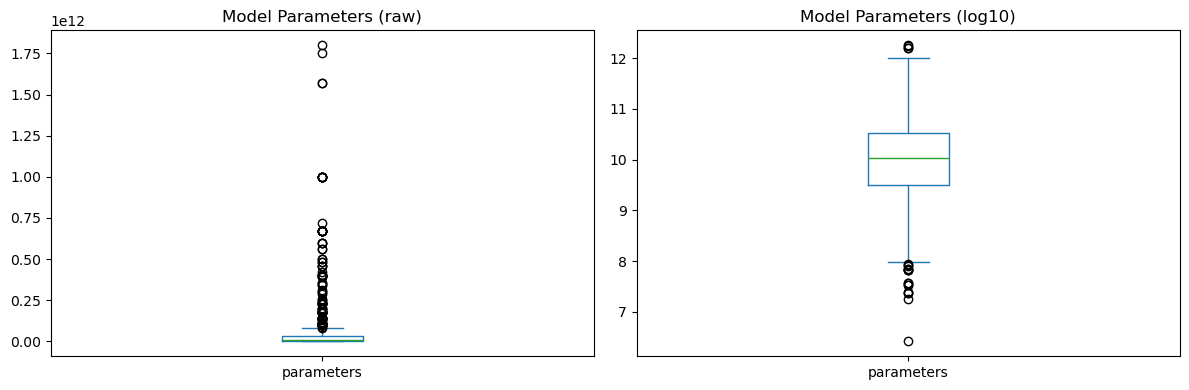

In [14]:
# Check for outliers for model parameters in Epoch AI dataset
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

epoch_ai_clean['parameters'].dropna().plot(kind='box', ax=axes[0], title='Model Parameters (raw)')
epoch_ai_clean['parameters'].dropna().apply(np.log10).plot(kind='box', ax=axes[1], title='Model Parameters (log10)')

plt.tight_layout()
plt.show()

<span style="color:red"> Visual shows a high number of outliers in raw scale, not surprising given the exponential growth in model sizes</span>

Create a summary visualization showing temporal trends and categorical distributions across my key datasets. These plots reveal the parallel growth in both AI model releases and cyber events over time.

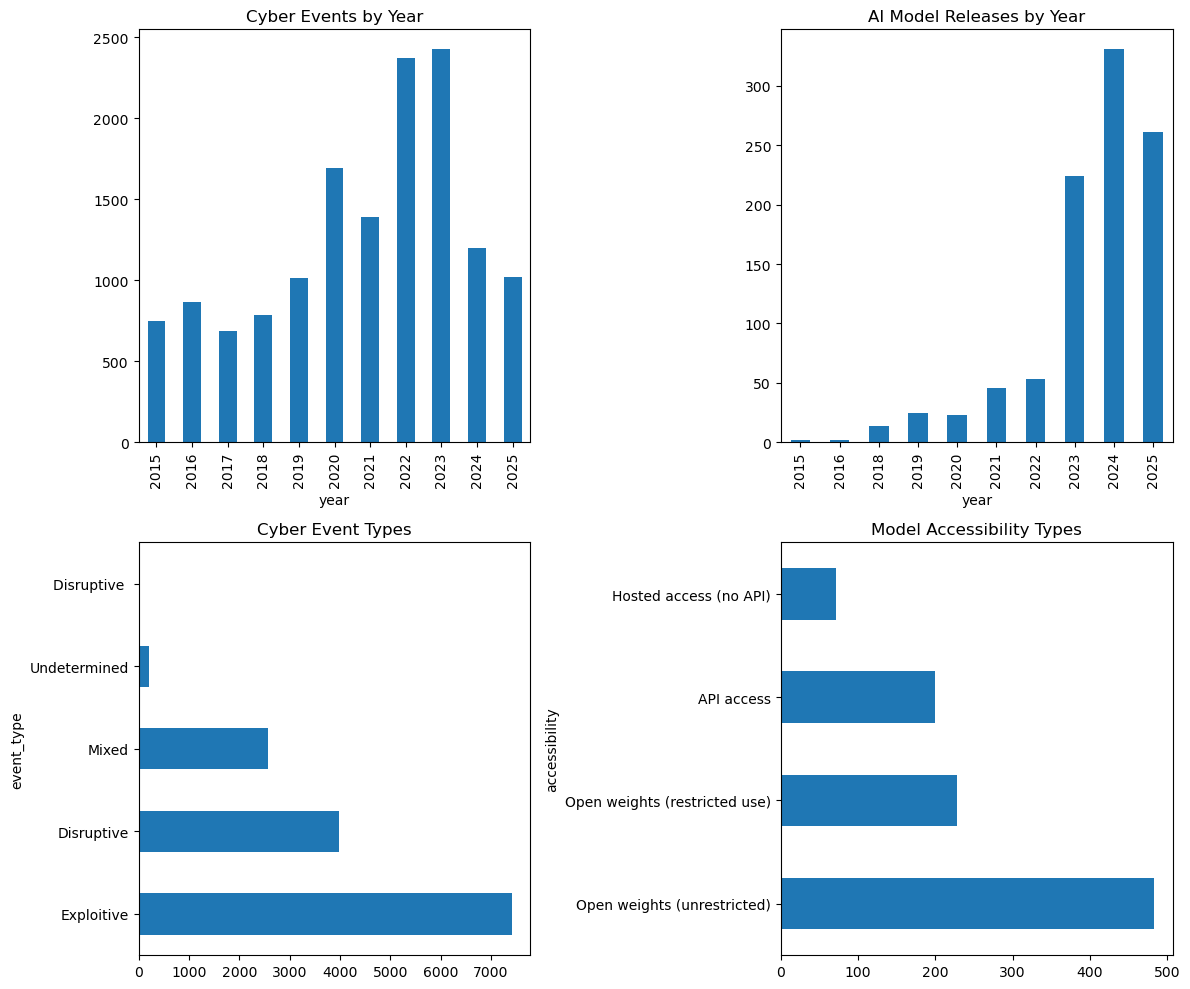

In [15]:
# Histogram of events over time and distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Events over time
cyber_events_clean.groupby('year').size().plot(kind='bar', ax=axes[0,0], title='Cyber Events by Year')
epoch_ai_clean.groupby('year').size().plot(kind='bar', ax=axes[0,1], title='AI Model Releases by Year')

# Categorical distributions
cyber_events_clean['event_type'].value_counts().plot(kind='barh', ax=axes[1,0], title='Cyber Event Types')
epoch_ai_clean['accessibility'].value_counts().plot(kind='barh', ax=axes[1,1], title='Model Accessibility Types')

plt.tight_layout()
plt.show()

<span style = "color:red">Cyber events trending upwards. We see an initial correlation between AI model releases and cyber events.</span>

Aggregate my cleaned datasets by year and combine them into a single dataframe for correlation analysis. This allows me to quantify the relationship between:
- **Cyber event frequency** (CISSM database)
- **AI model releases** (Epoch AI — public language models)
- **AI-related incidents** (AI Incident Database)

The scatter matrix visualizes pairwise relationships, while the correlation matrix provides Pearson coefficients to measure the strength of these relationships.

'Yearly Aggregated Data'

,cyber_events,ai_models,ai_incidents
year,,,
2015,748,2.0,24.0
2016,863,2.0,41.0
2018,788,14.0,42.0
2019,1012,25.0,37.0
2020,1691,23.0,78.0
2021,1389,46.0,65.0
2022,2372,53.0,90.0
2023,2426,224.0,45.0


'Correlation Matrix'

,cyber_events,ai_models,ai_incidents
cyber_events,1.000000,0.743687,0.673121
ai_models,0.743687,1.000000,0.065468
ai_incidents,0.673121,0.065468,1.000000


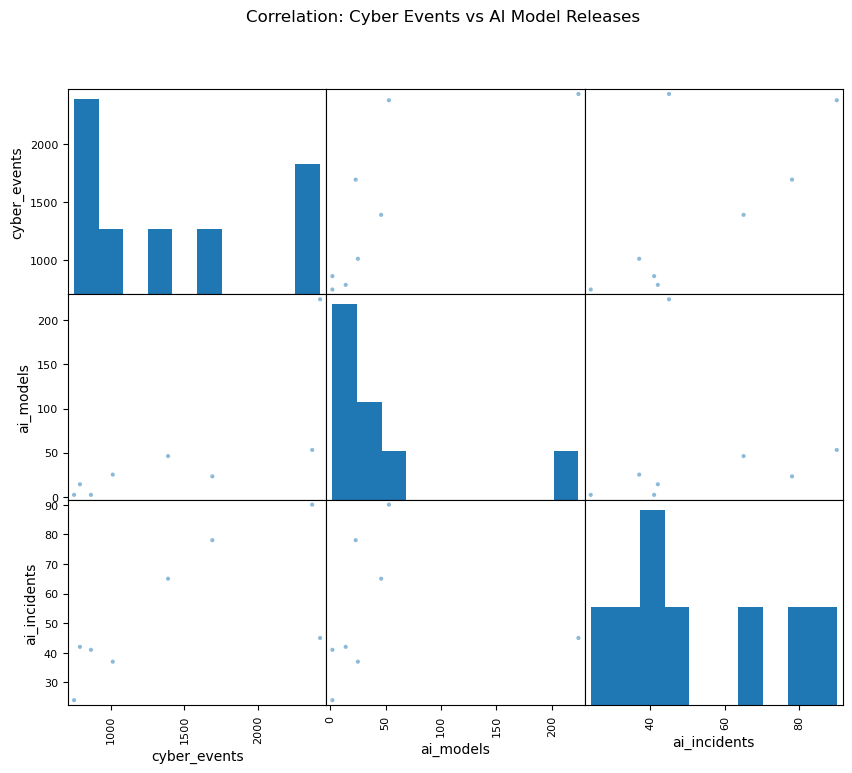

In [16]:
# Correlation analysis between AI model releases and cyber events

# Aggregate by year for correlation
yearly_cyber = cyber_events_clean.groupby('year').size().rename('cyber_events')
yearly_ai = epoch_ai_clean.groupby('year').size().rename('ai_models')
yearly_ai_incidents = ai_incidents_clean.groupby('year').size().rename('ai_incidents')

yearly_combined = pd.concat([yearly_cyber, yearly_ai, yearly_ai_incidents], axis=1).dropna()

display("Yearly Aggregated Data")
display(yearly_combined)

display("Correlation Matrix")
display(yearly_combined.corr())

# Scatter matrix visualization
from pandas.plotting import scatter_matrix
scatter_matrix(yearly_combined, figsize=(10, 8), diagonal='hist')
plt.suptitle('Correlation: Cyber Events vs AI Model Releases')
plt.show()

<span style = "color:red">All three variables in the visual move together, when one goes up, the other tend to follow. This gives us a very strong correlation coefficient of 0.744</span>

#### Pre-AI vs Post-AI Era Comparison
Bar charts comparing event volumes across eras. This visualization highlights the increase in both AI model releases and cyber events following ChatGPT's public release

**Note:** *The post-AI era (2023+) represents a shorter time period than pre-AI (2015-2022), so raw counts should be interpreted with this in mind.*

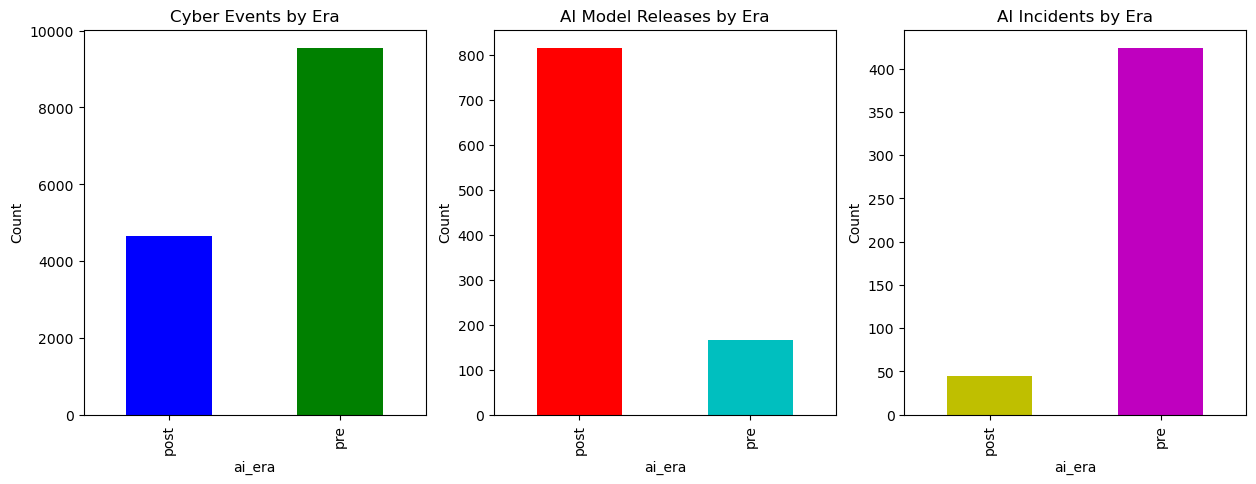

In [17]:
# Bar Chart Pre vs Post AI Era comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Cyber events by era
cyber_events_clean.groupby('ai_era').size().plot(kind='bar', ax=axes[0], title='Cyber Events by Era', color=['b', 'g'])
axes[0].set_ylabel('Count')

# AI model releases by era
epoch_ai_clean.groupby('ai_era').size().plot(kind='bar', ax=axes[1], title='AI Model Releases by Era', color=['r', 'c'])
axes[1].set_ylabel('Count')

# AI incidents by era
ai_incidents_clean.groupby('ai_era').size().plot(kind='bar', ax=axes[2], title='AI Incidents by Era', color=['y', 'm'])
axes[2].set_ylabel('Count')

plt.show()

<span style = "color:red">Post AI has fewer total events BUT covers fewer years. When you do the math (on average): 2,300/year post-AI vs 1,190/year pre-AI — attacks nearly doubled!</span>

A scatter plot with regression line visualizing the strong positive correlation (r=0.744) between public AI model releases and cyber event frequency. Each point represents one year, with annotations showing the temporal progression from 2015 to 2023

This visualization supports my hypothesis that increased AI accessibility correlates with increased cybercrime activity.

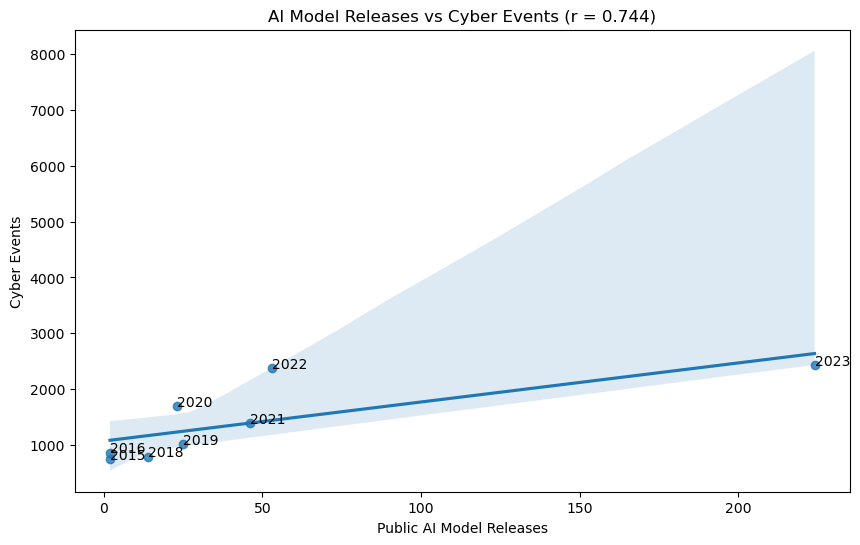

In [18]:
# Scatter plot with regression line

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data=yearly_combined, x='ai_models', y='cyber_events', ax=ax)
# Cyber events to AI model releases correlation
ax.set_title(f'AI Model Releases vs Cyber Events (r = 0.744)')
ax.set_xlabel('Public AI Model Releases')
ax.set_ylabel('Cyber Events')

# Annotate key years
for year in yearly_combined.index:
    ax.annotate(str(year), (yearly_combined.loc[year, 'ai_models'], yearly_combined.loc[year, 'cyber_events']))

plt.show()

<span style = "color:red">Correlation coefficient of 0.744 equals a very strong positive correlation. Points flow from bottom-left (early years) to top-right (recent years).</span>

A dual-axis time series showing the parallel growth of cyber events and AI model releases from 2015 to present. The vertical dashed line marks ChatGPT's public release (November 2022), which defines our pre/post AI era boundary.

This visualization illustrates how both metrics have risen together over time, increasing in recent years.

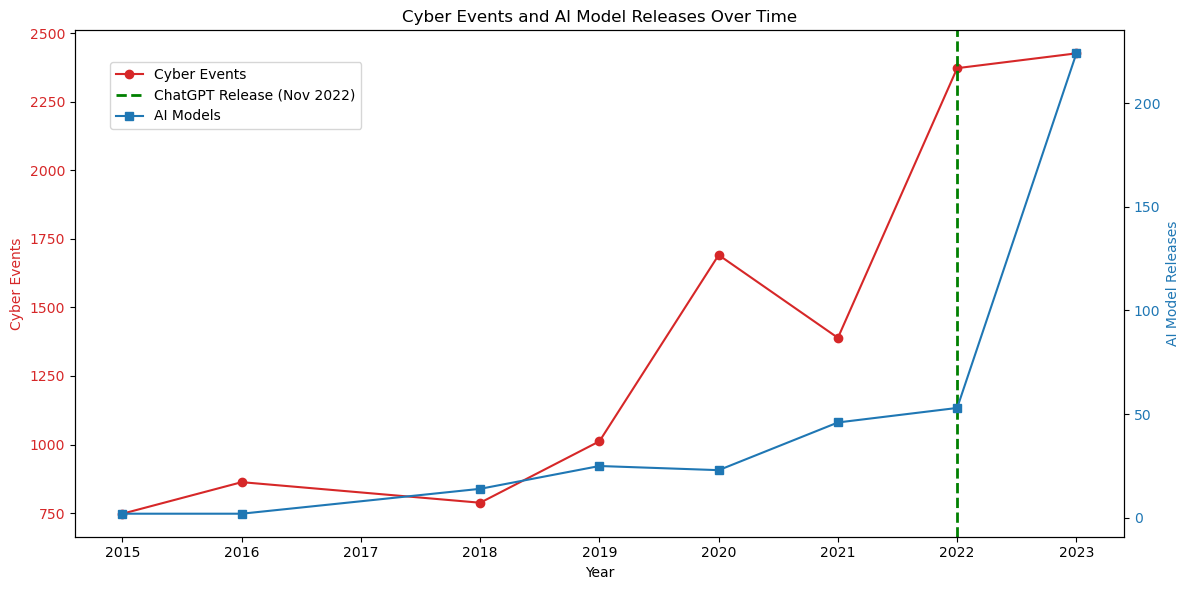

In [19]:
# Distribution chart of time series with ChatGPT release marked
fig, ax1 = plt.subplots(figsize=(12, 6))

# Cyber events line
ax1.set_xlabel('Year')
ax1.set_ylabel('Cyber Events', color='tab:red')
ax1.plot(yearly_combined.index, yearly_combined['cyber_events'], color='tab:red', marker='o', label='Cyber Events')
ax1.tick_params(axis='y', labelcolor='tab:red')

# AI models line (secondary axis)
ax2 = ax1.twinx()
ax2.set_ylabel('AI Model Releases', color='tab:blue')
ax2.plot(yearly_combined.index, yearly_combined['ai_models'], color='tab:blue', marker='s', label='AI Models')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Mark ChatGPT release
ax1.axvline(x=2022, color='g', linestyle='--', linewidth=2, label='ChatGPT Release (Nov 2022)')

plt.title('Cyber Events and AI Model Releases Over Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.09, 0.9))
plt.tight_layout()
plt.show()

<span style = "color:red">Both cyber events and AI models climb together over time. Big spike around 2022-2023 which would coincide with the public availability of ChatGPT.</span>

Pie charts comparing the distribution of cyber event types before and after AI became widely accessible. These charts show whether the composition of attack types shifted between eras.

This helps answer: Did AI change *what kinds* of attacks occur, or just *how many*?

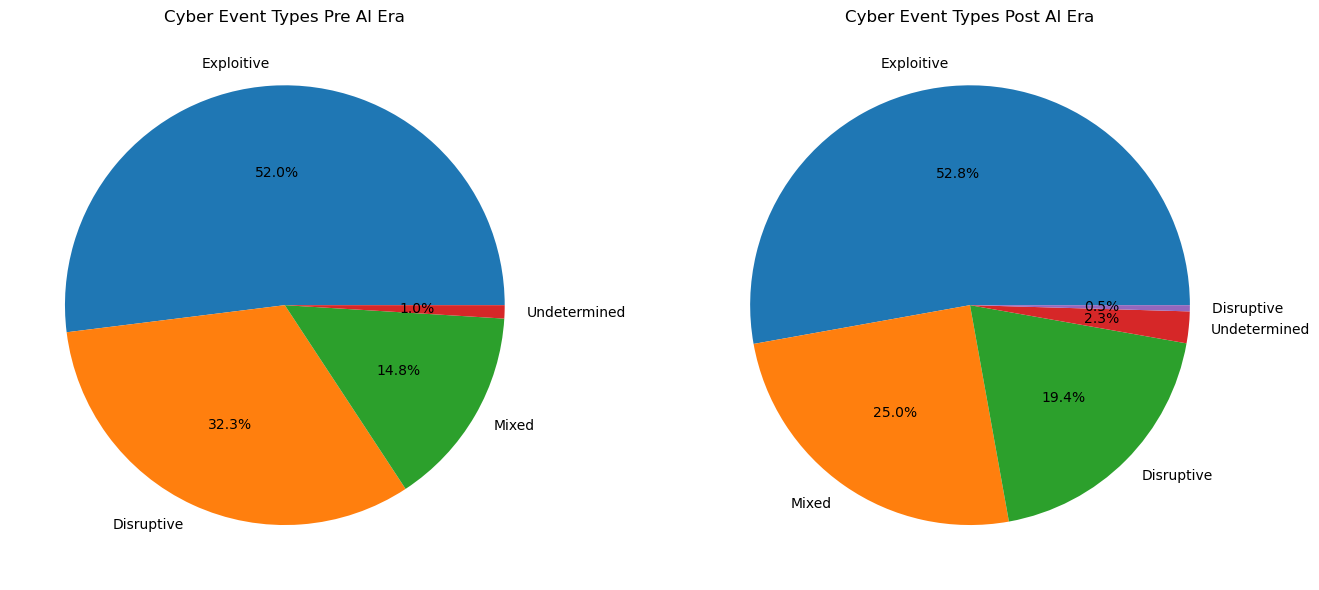

In [20]:
# Attack types pre vs post AI era
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cyber_events_clean[cyber_events_clean['ai_era'] == 'pre']['event_type'].value_counts().plot(
    kind='pie', ax=axes[0], title='Cyber Event Types Pre AI Era', autopct='%1.1f%%')
axes[0].set_ylabel('')

cyber_events_clean[cyber_events_clean['ai_era'] == 'post']['event_type'].value_counts().plot(
    kind='pie', ax=axes[1], title='Cyber Event Types Post AI Era', autopct='%1.1f%%')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

<span style = "color:red">Attack types barely changed between eras. Exploitive stays ~52% in both. AI didn't create new attack types, just more of them.</span>

---
# Interactive Data Visualizations

#### Interactive Time Series: Cyber Events vs AI Model Releases
An enhanced version of the dual-axis time series

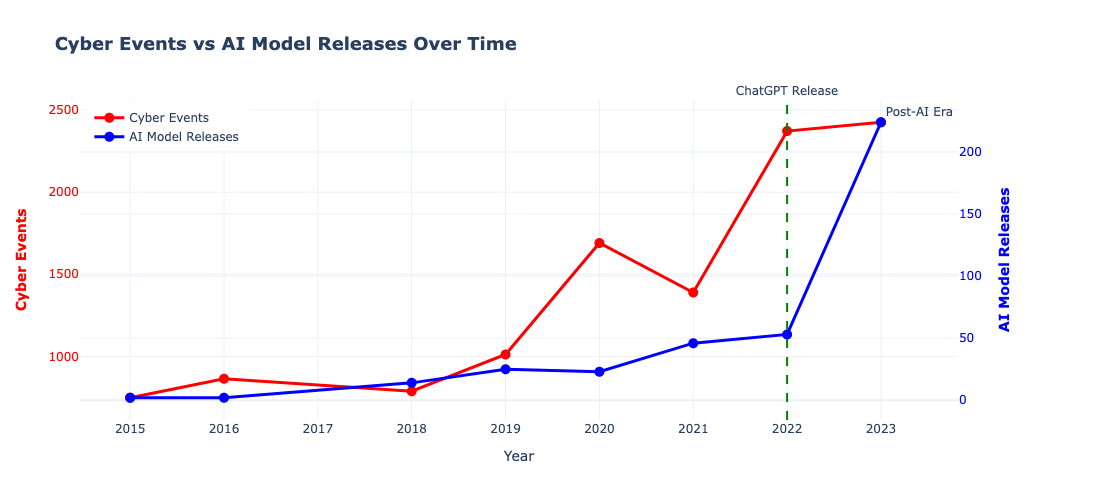

In [21]:
# Dual axis time series with ChatGPT release marked

# Reset index if 'year' is the index
if 'year' not in yearly_combined.columns:
    yearly_combined = yearly_combined.reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add cyber events trace
fig.add_trace(
    go.Scatter(
        x=yearly_combined['year'], 
        y=yearly_combined['cyber_events'],
        name="Cyber Events",
        line=dict(color='red', width=3),
        mode='lines+markers',
        marker=dict(size=10),
        hovertemplate='<b>Year:</b> %{x}<br><b>Cyber Events:</b> %{y}<extra></extra>'
    ),
    secondary_y=False,
)

# Add AI models trace
fig.add_trace(
    go.Scatter(
        x=yearly_combined['year'], 
        y=yearly_combined['ai_models'],
        name="AI Model Releases",
        line=dict(color='blue', width=3),
        mode='lines+markers',
        marker=dict(size=10),
        hovertemplate='<b>Year:</b> %{x}<br><b>AI Models:</b> %{y}<extra></extra>'
    ),
    secondary_y=True,
)

# Add vertical line for ChatGPT release
fig.add_vline(x=2022, line_dash="dash", line_color="green", line_width=2,
              annotation_text="ChatGPT Release", annotation_position="top")

# Add shaded region for post-AI era
fig.add_vrect(x0=2023, x1=yearly_combined['year'].max(), 
              fillcolor="lightgreen", opacity=0.2, line_width=0,
              annotation_text="Post-AI Era", annotation_position="top left")

# Update layout
fig.update_layout(
    title=dict(
        text='<b>Cyber Events vs AI Model Releases Over Time</b>',
        font=dict(size=18)
    ),
    xaxis_title="Year",
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.8)'),
    hovermode='x unified',
    template='plotly_white',
    height=500
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>Cyber Events</b>", secondary_y=False, color='red')
fig.update_yaxes(title_text="<b>AI Model Releases</b>", secondary_y=True, color='blue')

fig.show()

<span style = "color:red">Interactive visual showing both cyber events and AI models climb together over time. Big spike around 2022-2023 which would coincide with the public availability of ChatGPT.</span>

#### An enhanced scatter plot showing the relationship between AI model releases and cyber events.

The p-value < 0.05 indicates this correlation is statistically significant, there is only a 3.4% probability this relationship occurred by random chance.

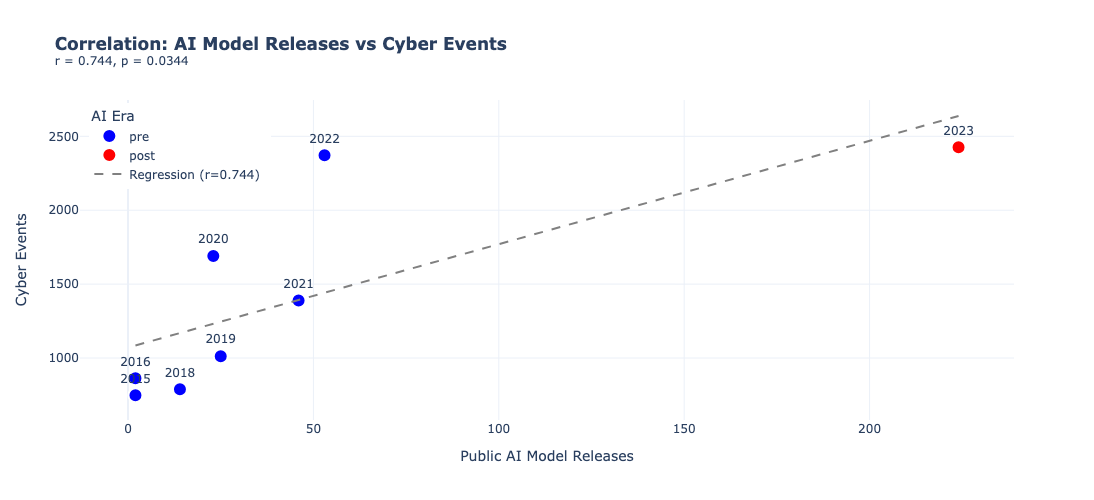

In [22]:
# Scatter plot with regression line using Plotly

# Reset index if needed
if 'year' not in yearly_combined.columns:
    yearly_combined = yearly_combined.reset_index()

# Add ai_era column if it doesn't exist
if 'ai_era' not in yearly_combined.columns:
    yearly_combined['ai_era'] = np.where(yearly_combined['year'] >= 2023, 'post', 'pre')

# Calculate regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(
    yearly_combined['ai_models'], 
    yearly_combined['cyber_events']
)

# Create scatter plot
fig = px.scatter(
    yearly_combined, 
    x='ai_models', 
    y='cyber_events',
    text='year',
    color='ai_era',
    color_discrete_map={'pre': 'blue', 'post': 'red'},
    labels={
        'ai_models': 'Public AI Model Releases',
        'cyber_events': 'Cyber Events',
        'ai_era': 'AI Era'
    },
    title=f'<b>Correlation: AI Model Releases vs Cyber Events</b><br><sup>r = {r_value:.3f}, p = {p_value:.4f}</sup>'
)

# Add regression line
x_range = np.array([yearly_combined['ai_models'].min(), yearly_combined['ai_models'].max()])
y_pred = slope * x_range + intercept

fig.add_trace(
    go.Scatter(
        x=x_range, 
        y=y_pred,
        mode='lines',
        name=f'Regression (r={r_value:.3f})',
        line=dict(color='gray', dash='dash', width=2)
    )
)

# Update marker styling
fig.update_traces(
    marker=dict(size=14, line=dict(width=2, color='white')),
    textposition='top center',
    selector=dict(mode='markers+text')
)

# Update layout
fig.update_layout(
    template='plotly_white',
    height=500,
    legend=dict(x=0.01, y=0.99),
    hovermode='closest'
)

# Update hover template for scatter points
fig.update_traces(
    hovertemplate='<b>Year:</b> %{text}<br><b>AI Models:</b> %{x}<br><b>Cyber Events:</b> %{y}<extra></extra>',
    selector=dict(mode='markers+text')
)

fig.show()

<span style = "color:red">Interactive scatterplot shows p-value of 0.034 which shows that there is a statistically significant (less than 4%) chance that this is random</span>

Multi line chart tracking which industries are most frequently targeted by cyber attacks over time.
- **Which sectors** face the highest attack volumes
- **Trend patterns** — are certain industries experiencing accelerating attacks?
- **Pre vs post AI era shifts** — did targeting priorities change after AI became accessible?

The ChatGPT release marker shows comparison of industry targeting patterns before and after widespread AI availability.

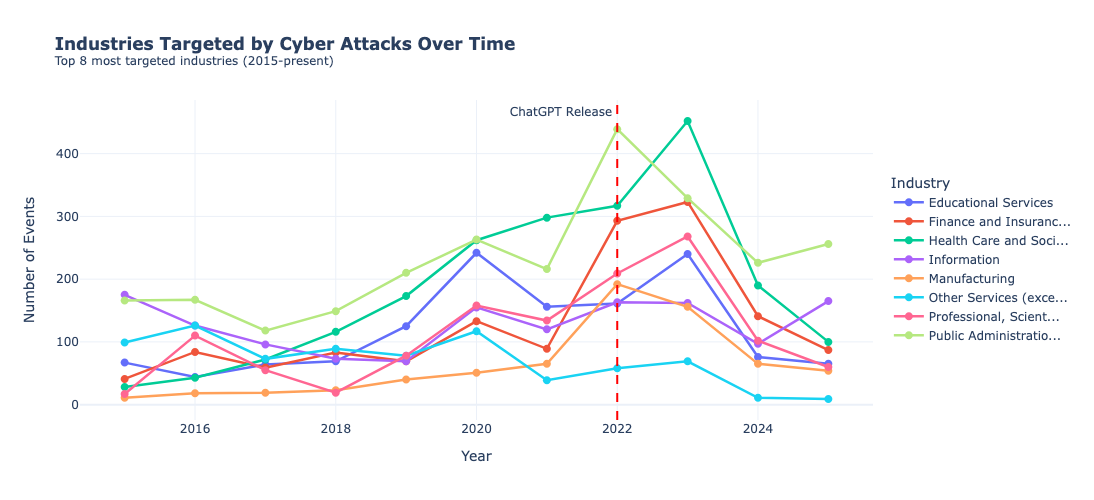

In [23]:
# Line Chart of Industries Targeted by Cyber Attacks Over Time

# Aggregate by year and industry
industry_by_year = cyber_events_clean.groupby(['year', 'industry']).size().reset_index(name='count')

# Filter to analysis period (2015+)
industry_by_year = industry_by_year[industry_by_year['year'] >= 2015]

# Truncate industry names to 20 characters and add ... 
industry_by_year['industry_short'] = industry_by_year['industry'].str[:20] + \
    industry_by_year['industry'].str.len().gt(20).map({True: '...', False: ''})

# Get top 8 industries overall (to keep chart readable)
top_industries = cyber_events_clean['industry'].value_counts().head(8).index.tolist()
industry_by_year_top = industry_by_year[industry_by_year['industry'].isin(top_industries)]

# Create interactive line chart
fig = px.line(
    industry_by_year_top,
    x='year',
    y='count',
    color='industry_short',
    markers=True,
    title='<b>Industries Targeted by Cyber Attacks Over Time</b><br><sup>Top 8 most targeted industries (2015-present)</sup>',
    labels={'count': 'Number of Events', 'year': 'Year', 'industry_short': 'Industry'}
)

# Add ChatGPT release marker
fig.add_vline(x=2022, line_dash="dash", line_color="red", line_width=2,
              annotation_text="ChatGPT Release", annotation_position="top left")


fig.update_layout(
    template='plotly_white',
    height=500,
    hovermode='x unified',
    legend=dict(title='Industry', y=0.5)
)

fig.update_traces(line=dict(width=2.5), marker=dict(size=8))

fig.show()

<span style = "color:red">Healthcare dominates and peaked 2023 with Public Administration staying consistently high. Most industries spiked around 2022-2023, (which is significant as this was the time frame of hte publc availability of ChatGPT) then declined slightly in 2024.</span>

---
# Data Pipelines for Machine Learning
In this section, I build classification models to predict whether a cyber event occurred in the pre-AI or post-AI era based on its characteristics (event type, actor type, motive, industry). This helps to understand whether attack patterns have fundamentally changed since AI became widely accessible.

#### Preparing Data for Classification
We prepare our event-level data for machine learning by:
- Filtering to the analysis period (2015+)
- Creating the target variable (`ai_era`: pre vs post)
- Checking for class imbalance between eras

In [24]:
# Prepare event-level data for classification
# Filter to analysis period (2015+)
cyber_ml = cyber_events_clean[cyber_events_clean['year'] >= 2015].copy()

# Create target variable for ai_era 
cyber_ml['ai_era'] = np.where(cyber_ml['year'] >= 2023, 'post', 'pre')

# Check the data
display("Dataset shape:", cyber_ml.shape)
display("Target distribution:")
display(cyber_ml['ai_era'].value_counts())
cyber_ml.head()

'Dataset shape:'

(14194, 11)

'Target distribution:'

ai_era
pre     9552
post    4642
Name: count, dtype: int64

,event_date,year,month,actor_type,motive,event_type,event_subtype,industry,country,description,ai_era
93,2015-03-30,2015,3,Hacktivist,Undetermined,Disruptive,Message Manipulation,Transportation and Warehousing,France,The website of Air France's national mutual so...,pre
139,2022-11-11,2022,11,Criminal,Financial,Mixed,Data Attack,Manufacturing,France,"BlackCat ransomware gang lists Conforama, said...",pre
174,2023-06-03,2023,6,Criminal,Financial,Mixed,Data Attack,Manufacturing,France,The ALPHV/BlackCat ransomware gang claims resp...,post
234,2023-11-07,2023,11,Criminal,Financial,Mixed,Exploitation of Application Server,Transportation and Warehousing,France,The ALPHV/BlackCat ransomware group claims res...,post
268,2016-05-23,2016,5,Hacktivist,Undetermined,Disruptive,Message Manipulation,"Professional, Scientific, and Technical Services",France,A hacker who goes by the nickname ofÃÆÃ'Ãâ...,pre


Select four categorical features that describe the characteristics of each cyber event:

| Feature | Description |
|---------|-------------|
| `event_type` | Type of attack (ransomware, data breach, etc.) |
| `actor_type` | Who conducted the attack (nation-state, criminal group, etc.) |
| `motive` | Purpose of the attack (financial gain, espionage, etc.) |
| `industry` | Targeted sector (healthcare, finance, government, etc.) |

**Note:** _Rows with missing values in these features are removed_

In [25]:
# Separate features and target
feature_cols = ['event_type', 'actor_type', 'motive', 'industry']

# Drop rows with missing values in our feature columns
cyber_ml_clean = cyber_ml.dropna(subset=feature_cols)

cyber_X = cyber_ml_clean[feature_cols]
cyber_y = cyber_ml_clean['ai_era']

display("Features shape:", cyber_X.shape)
display("Target shape:", cyber_y.shape)

'Features shape:'

(14194, 4)

'Target shape:'

(14194,)

Split the data into training (80%) and test (20%) sets using **stratified sampling** to maintain the same class distribution in both sets. This is important because:<br><br>
**Note:** _The classes are imbalanced (more pre than post events)_

In [26]:
# Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    cyber_X, cyber_y, 
    test_size=0.2, 
    random_state=42, 
    stratify=cyber_y
)

display("Training set size:", len(X_train))
display("Test set size:", len(X_test))
display("Training target distribution:")
display(y_train.value_counts())

'Training set size:'

11355

'Test set size:'

2839

'Training target distribution:'

ai_era
pre     7641
post    3714
Name: count, dtype: int64

Construct a scikit-learn pipeline to systematically preprocess categorical features:

**SimpleImputer:** Fill missing values with 'Unknown'<br>
**OneHotEncoder:** Convert categories to binary features

In [27]:
# Define numeric and categorical features
cat_features = ['event_type', 'actor_type', 'motive', 'industry']

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('one-hot-encode', OneHotEncoder(handle_unknown='ignore'))
])

# Full pipeline using ColumnTransformer
full_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, cat_features)
])

# Transform the training data
X_train_prepared = full_pipeline.fit_transform(X_train)
display("Transformed training data shape:", X_train_prepared.shape)

'Transformed training data shape:'

(11355, 49)

Train three classification models with different characteristics, Logistic Regression Model, Decision Tree and Random Forest.<br><br>

Training accuracy provides an initial check, but i'll use cross-validation and test set evaluation to assess true model performance.

In [28]:
# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_prepared, y_train)

# Predictions on training data
predictions = log_reg.predict(X_train_prepared)
train_accuracy = accuracy_score(y_train, predictions)
display("Logistic Regression Training Accuracy:", train_accuracy)

# Model 2: Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_prepared, y_train)

predictions = tree_clf.predict(X_train_prepared)
tree_train_accuracy = accuracy_score(y_train, predictions)
display("Decision Tree Training Accuracy:", tree_train_accuracy)

# Model 3: Random Forest
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train_prepared, y_train)

predictions = forest_clf.predict(X_train_prepared)
forest_train_accuracy = accuracy_score(y_train, predictions)
display("Random Forest Training Accuracy:", forest_train_accuracy)


'Logistic Regression Training Accuracy:'

0.6776750330250991

'Decision Tree Training Accuracy:'

0.7053280493174813

'Random Forest Training Accuracy:'

0.7053280493174813

Use cross validation to get a more reliable estimate of model performance.

In [29]:
# Cross validation for Logistic Regression

log_scores = cross_val_score(log_reg, X_train_prepared, y_train, cv=5, scoring='accuracy')
display("Logistic Regression CV Scores:", log_scores)
display("Mean:", log_scores.mean())
display("Std:", log_scores.std())

# Cross validation for Decision Tree
tree_scores = cross_val_score(tree_clf, X_train_prepared, y_train, cv=5, scoring='accuracy')
display("Decision Tree CV Scores:", tree_scores)
display("Mean:", tree_scores.mean())
display("Std:", tree_scores.std())

# Cross validation for Random Forest
forest_scores = cross_val_score(forest_clf, X_train_prepared, y_train, cv=5, scoring='accuracy')
display("Random Forest CV Scores:", forest_scores)
display("Mean:", forest_scores.mean())
display("Std:", forest_scores.std())

'Logistic Regression CV Scores:'

array([0.67107001, 0.67327169, 0.68031704, 0.68119771, 0.68075738])

'Mean:'

np.float64(0.6773227653016294)

'Std:'

np.float64(0.004272834688052206)

'Decision Tree CV Scores:'

array([0.67767503, 0.68648173, 0.68339938, 0.68824306, 0.69396742])

'Mean:'

np.float64(0.6859533245266402)

'Std:'

np.float64(0.005381458782017488)

'Random Forest CV Scores:'

array([0.68339938, 0.68692206, 0.68824306, 0.68824306, 0.69528842])

'Mean:'

np.float64(0.6884191985909291)

'Std:'

np.float64(0.003864924395859413)

Evaluate all models on the test set


In [30]:
# Evaluate on test set
X_test_prepared = full_pipeline.transform(X_test)

# Logistic Regression on test set
predictions_log = log_reg.predict(X_test_prepared)
log_test_accuracy = accuracy_score(y_test, predictions_log)
display("Logistic Regression Test Accuracy:", log_test_accuracy)

# Decision Tree on test set
predictions_tree = tree_clf.predict(X_test_prepared)
tree_test_accuracy = accuracy_score(y_test, predictions_tree)
display("Decision Tree Test Accuracy:", tree_test_accuracy)

# Random Forest on test set
predictions_forest = forest_clf.predict(X_test_prepared)
forest_test_accuracy = accuracy_score(y_test, predictions_forest)
display("Random Forest Test Accuracy:", forest_test_accuracy)

# Detailed classification report for best model
display("Classification Report (Random Forest):")
display(classification_report(y_test, predictions_forest))

# Summary comparison (like comparing lin_rmse, poly_rmse, tree_rmse in sandbox)
display("="*50)
display("MODEL COMPARISON SUMMARY")
display("="*50)
display(f"{'Model':<25} {'CV Mean':<12} {'CV Std':<12} {'Test Acc':<12}")
display("-"*50)
display(f"{'Logistic Regression':<25} {log_scores.mean():<12.4f} {log_scores.std():<12.4f} {log_test_accuracy:<12.4f}")
display(f"{'Decision Tree':<25} {tree_scores.mean():<12.4f} {tree_scores.std():<12.4f} {tree_test_accuracy:<12.4f}")
display(f"{'Random Forest':<25} {forest_scores.mean():<12.4f} {forest_scores.std():<12.4f} {forest_test_accuracy:<12.4f}")

'Logistic Regression Test Accuracy:'

0.6773511799929552

'Decision Tree Test Accuracy:'

0.6861570975695668

'Random Forest Test Accuracy:'

0.6865093342726312

'Classification Report (Random Forest):'

'              precision    recall  f1-score   support\n\n        post       0.56      0.20      0.29       928\n         pre       0.70      0.92      0.80      1911\n\n    accuracy                           0.69      2839\n   macro avg       0.63      0.56      0.55      2839\nweighted avg       0.66      0.69      0.63      2839\n'

'=================================================='

'MODEL COMPARISON SUMMARY'

'=================================================='

'Model                     CV Mean      CV Std       Test Acc    '

'--------------------------------------------------'

'Logistic Regression       0.6773       0.0043       0.6774      '

'Decision Tree             0.6860       0.0054       0.6862      '

'Random Forest             0.6884       0.0039       0.6865      '

---
# Conclusion

### Hypothesis: 
*AI availability has likely contributed to an increase in cybercrime volume and sophistication, as these tools lower technical barriers for attackers and eliminate traditional red flags such as misspellings in phishing emails.*

### Findings:
According to this analysis, I found a statistically significant positive correlation (r=0.744, p=0.034) between public AI model releases and cyber event frequency. The probability of this relationship occurring by chance is only 3.4%.

**More attacks after AI became available**
   - Pre-AI era: ~1,190 cyber events per year
   - Post-AI era: ~2,300 cyber events per year
   - That's almost double!

**Attack types stayed mostly the same**
   - Exploitive attacks: 52% before, 52% after
   - AI didn't create new attack types — it just made existing attacks easier to scale

**Our ML models got ~68% accuracy**
   - Better than guessing (50%) but not amazing
   - This confirms attacks changed *somewhat* but not dramatically

## What this means
AI availability has lowered the barrier of entry for certain types of cyber crime. While these tools are designed for legitimate use and have strong safeguards, they can unintentionally help less skilled individuals to use advanced cyber techniques involved in many of todays cyber events. This doesn’t mean AI is 'causing' cyber crime, but it does change the landscape, attackers no longer need to be highly skilled writers or deeply technical to participate, which has contributed to an overall increase in volume and sophistication of attacks.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
* https://www.w3schools.com/python/pandas/ref_df_corr.asp
* https://docs.scipy.org/doc/scipy/reference/main_namespace.html 
* https://wesmckinney.com/book/ 
* https://jakevdp.github.io/PythonDataScienceHandbook/
* https://github.com/IT4063C-Fall22/Sandbox/blob/e2e/sandbox.ipynb 

In [33]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 43014 bytes to source.py
